In [1]:
import os
import shutil
import pandas as pd
from pathlib import Path
import pydicom
import matplotlib.pylab as plt
import numpy as np
import random
import cv2
import UtilFunctions
import Preprocessing

Count how many .dcm files before executing

In [40]:
top = 'D:\CBIS-DDSM-DICOM\CBIS-DDSM'

before = 0

# Count number of .dcm files in ../data/Mass/Test.
for rootdir, dirs, files in os.walk(top):
    for f in files:
      before += 1

print(f"BEFORE --> Number of .dcm files: {before}")

BEFORE --> Number of .dcm files: 3867


Execute

In [3]:
# Rename and move .dcm files.
for (curdir, dirs, files) in os.walk(top=top, topdown=False):

    dirs.sort()
    files.sort()

    print(f"WE ARE AT: {curdir}")
    print("=" * 10)

    for f in files:

        # === Step 1: Rename .dcm file ===
        if f.endswith(".dcm"):

            old_name_path = os.path.join(curdir, f)
            new_name = UtilFunctions.new_name_dcm(dcm_path=old_name_path)

            if new_name:
                new_name_path = os.path.join(curdir, new_name)
                os.rename(old_name_path, new_name_path)

                # === Step 2: Move RENAMED .dcm file ===
                UtilFunctions.move_dcm_up(dest_dir=top, source_dir=new_name_path, dcm_filename=new_name)

    print()
    print("Moving one folder up...")
    print("-" * 40)
    print()

WE ARE AT: D:\CBIS-DDSM-DICOM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC\07-20-2016-DDSM-NA-74994\1.000000-full mammogram images-24515
FULL --- Mass-Training_P_00001_LEFT_CC_FULL.dcm

Moving one folder up...
----------------------------------------

WE ARE AT: D:\CBIS-DDSM-DICOM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC\07-20-2016-DDSM-NA-74994

Moving one folder up...
----------------------------------------

WE ARE AT: D:\CBIS-DDSM-DICOM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC

Moving one folder up...
----------------------------------------

WE ARE AT: D:\CBIS-DDSM-DICOM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\07-21-2016-DDSM-NA-39106\1.000000-ROI mask images-99650
MASK --- Mass-Training_P_00001_LEFT_CC_MASK_1.dcm
CROP --- Mass-Training_P_00001_LEFT_CC_CROP_1.dcm

Moving one folder up...
----------------------------------------

WE ARE AT: D:\CBIS-DDSM-DICOM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_1\07-21-2016-DDSM-NA-39106

Moving one folder up...
-------------------------------------

Count how many .dcm files after executing

In [41]:
after = 0

# Count number of .dcm files in ../data/Mass/Test.
for rootdir, dirs, files in os.walk(top):
    for f in files:
      after += 1

print(f"AFTER --> Number of .dcm files: {after}")

AFTER --> Number of .dcm files: 3867


Visualize one mammogram, mask and ROI

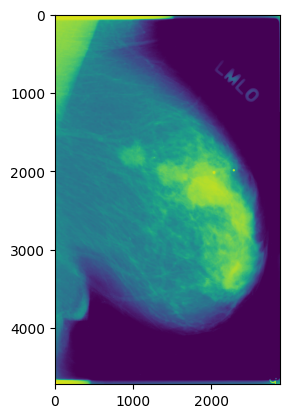

In [42]:
mammo_path = 'D:\CBIS-DDSM-DICOM\CBIS-DDSM\Mass-Training_P_00802_LEFT_MLO_FULL.dcm'
ds = pydicom.dcmread(mammo_path)

plt.imshow(ds.pixel_array)

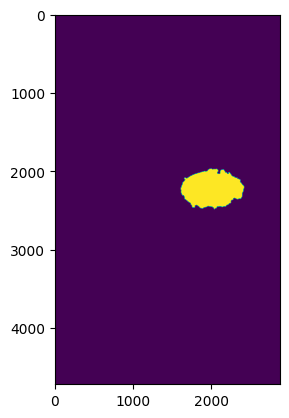

In [15]:
mask_path = 'D:\CBIS-DDSM-DICOM/CBIS-DDSM/Mass-Training_P_00802_LEFT_MLO_MASK_1.dcm'
ds = pydicom.dcmread(mask_path)

plt.imshow(ds.pixel_array)

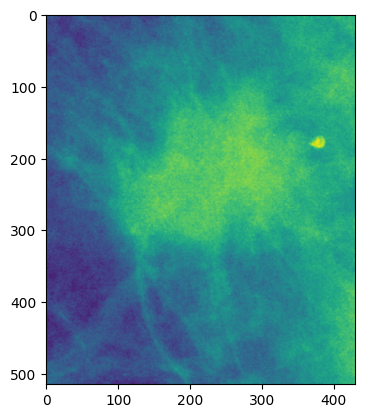

In [10]:
roi_path = 'D:\CBIS-DDSM-DICOM\CBIS-DDSM\Mass-Training_P_00001_LEFT_CC_CROP_1.dcm'
ds = pydicom.dcmread(roi_path)

plt.imshow(ds.pixel_array)

Seperate mammograms and masks into different folders.

In [43]:
counter = 0
for filename in os.listdir(top):

    # Save multiple masks which concern the same mammogram.
    masknameList = []

    f = os.path.join(top, filename)

    # Extract id of the dicom file.
    id = filename[16:21]

    # Extract information regarding the dicom file.
    if 'CC' in filename:
      dataType = 'CC'
    else: dataType = 'MLO'
    
    if 'RIGHT' in filename:
      way = 'RIGHT'
    else: way = 'LEFT'

    #print(filename,id)

    # For each mammogram...
    if 'FULL' in filename:
      # ...find its correspoding mask(s).
      for maskname in os.listdir(top):

        if id in maskname and 'MASK' in maskname and dataType in maskname and way in maskname:

          masknameList.append(maskname)
          
      # In the case the mammogram has multiple masks, store in a different folder in order to combine them in a later step.
      if len(masknameList) > 1:
        for maskname in masknameList:
          shutil.copy("D:\\CBIS-DDSM-DICOM\\CBIS-DDSM\\" + maskname, "D:\\BreastSegmentation\\Dataset_Second_Pipeline\\Data\\DDSM-multiple\\" + maskname)
          
      # If the mammogram has only one masks store it.
      else:          
        shutil.copy("D:\\CBIS-DDSM-DICOM\\CBIS-DDSM\\" + masknameList[0], "D:\\BreastSegmentation\\Dataset_Second_Pipeline\\Data\\DDSM-masks\\" + masknameList[0])
            
      # Store the mammogram
      shutil.copy("D:\\CBIS-DDSM-DICOM\\CBIS-DDSM\\" + filename, "D:\\BreastSegmentation\\Dataset_Second_Pipeline\\Data\\DDSM-mammograms\\" + filename)
          
      if len(masknameList) > 1: print('Stored mammogram ',filename, 'which has multiple masks.')
      else: print('Stored mammogram ',filename, 'with its mask ',maskname,'.')
      counter += 1

Stored mammogram  Mass-Training_P_00001_LEFT_CC_FULL.dcm with its mask  Mass-Training_P_02092_LEFT_MLO_MASK_1.dcm .
Stored mammogram  Mass-Training_P_00001_LEFT_MLO_FULL.dcm with its mask  Mass-Training_P_02092_LEFT_MLO_MASK_1.dcm .
Stored mammogram  Mass-Training_P_00004_LEFT_CC_FULL.dcm with its mask  Mass-Training_P_02092_LEFT_MLO_MASK_1.dcm .
Stored mammogram  Mass-Training_P_00004_LEFT_MLO_FULL.dcm with its mask  Mass-Training_P_02092_LEFT_MLO_MASK_1.dcm .
Stored mammogram  Mass-Training_P_00004_RIGHT_MLO_FULL.dcm with its mask  Mass-Training_P_02092_LEFT_MLO_MASK_1.dcm .
Stored mammogram  Mass-Training_P_00009_RIGHT_CC_FULL.dcm with its mask  Mass-Training_P_02092_LEFT_MLO_MASK_1.dcm .
Stored mammogram  Mass-Training_P_00009_RIGHT_MLO_FULL.dcm with its mask  Mass-Training_P_02092_LEFT_MLO_MASK_1.dcm .
Stored mammogram  Mass-Training_P_00015_LEFT_MLO_FULL.dcm with its mask  Mass-Training_P_02092_LEFT_MLO_MASK_1.dcm .
Stored mammogram  Mass-Training_P_00018_RIGHT_CC_FULL.dcm with i

Create a list of lists that contains all the groups of masks which concern the same mammograms.

In [3]:
commonList = []
masksList = []
counter = 0
common = 0

multiple_path = "D:\\BreastSegmentation\\Dataset_Second_Pipeline\\Data\\DDSM-multiple\\"

for filename in os.listdir(multiple_path):

  index = filename.find('.')
  common = filename[:index-1]

  if common not in commonList:

    masks = []

    for mask in os.listdir(multiple_path):

      maskCommon = mask[:mask.find('.')-1]

      if common == maskCommon:

        masks.append(multiple_path + mask)

    masksList.append(masks)
    commonList.append(common)

  counter += 1

print(masksList)

[['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_CC_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_CC_MASK_2.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_CC_MASK_3.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_CC_MASK_4.dcm'], ['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_MLO_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_MLO_MASK_2.dcm'], ['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00092_LEFT_MLO_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00092_LEFT_MLO_MASK_2.dcm'], ['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00092_RIGHT_MLO_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00092_RIGHT_MLO_MASK_2.dcm'], ['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00106_LEFT_CC_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00106_LEFT_CC_MASK_2.dcm', 'D:\\CBIS-Organized\\DDSM-mu

Combine each group of masks into one.

In [20]:
for masklist in masksList:

  print(masklist)

  mask_list = [pydicom.dcmread(mask_path) for mask_path in masklist]

  mask_list = [ds.pixel_array for ds in mask_list]

  summed_mask_bw = UtilFunctions.sumMasks(mask_list)
  print(masklist[0][32:masklist[0].find('.')-2])

  cv2.imwrite("D:\\CBIS-Organized\\temp\\" + masklist[0][32:masklist[0].find('.')-2] + ".png", summed_mask_bw)

['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_CC_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_CC_MASK_2.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_CC_MASK_3.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_CC_MASK_4.dcm']
Mass-Training_P_00044_RIGHT_CC_MASK
['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_MLO_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00044_RIGHT_MLO_MASK_2.dcm']
Mass-Training_P_00044_RIGHT_MLO_MASK
['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00092_LEFT_MLO_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00092_LEFT_MLO_MASK_2.dcm']
Mass-Training_P_00092_LEFT_MLO_MASK
['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00092_RIGHT_MLO_MASK_1.dcm', 'D:\\CBIS-Organized\\DDSM-multiple\\Mass-Training_P_00092_RIGHT_MLO_MASK_2.dcm']
Mass-Training_P_00092_RIGHT_MLO_MASK
['D:\\CBIS-Organized\\DDSM-multiple\\Mass-Trai

Create txt files with the paths of all mammograms + masks.

In [11]:
with open('masks.txt', 'w') as f:
  for filename in os.listdir("D:\\BreastSegmentation\\Dataset\\Data\\DDSM-masks\\"): 
    f.write("D:\\BreastSegmentation\\Dataset\\Data\\DDSM-masks\\" + filename + '\n')

with open('images.txt', 'w') as f:
  for filename in os.listdir("D:\\BreastSegmentation\\Dataset\\Data\\DDSM-mammograms\\"):
    f.write("D:\\BreastSegmentation\\Dataset\\Data\\DDSM-mammograms\\" + filename + '\n')
    
with open(r"masks.txt", 'r') as fp:
    for count, line in enumerate(fp):
        pass
print('Total Number of lines:', count + 1)

Total Number of lines: 1231


Apply preprocessing to all mammograms + masks and save as .png files.

In [14]:
with open('images.txt', 'r') as images:
  fullmamm_paths = [f for f in images]
  fullmamm_paths.sort()

with open('masks.txt', 'r') as masks:
  masks_paths = [f for f in masks]
  masks_paths.sort()

  shapes = []

  counter = 0

  for index in range(len(fullmamm_paths)):

    #print(fullmamm_paths[index], masks_paths[index])

    img = fullmamm_paths[index]
    mask = masks_paths[index]

    # Read full mammogram .dcm file.
    try:
      ds = pydicom.dcmread(img.replace("\n", ""))
    except:
      continue
    fullmamm = ds.pixel_array

    print(fullmamm.shape)

    if '.dcm' in mask:
      # Read mask .dcm file.
      ds = pydicom.dcmread(mask.replace("\n", ""))
      mask = ds.pixel_array
    else:
      mask = cv2.imread(mask.replace("\n", ""))
      mask = mask[:,:,0]

    fullmamm_pre, lr_flip = Preprocessing.fullMammoPreprocess(img=fullmamm)

    print(fullmamm_pre.shape)

    # Need to normalise to [0, 255] before saving as .png.
    fullmamm_pre_norm = cv2.normalize(
              fullmamm_pre,
              None,
              alpha=0,
              beta=255,
              norm_type=cv2.NORM_MINMAX,
              dtype=cv2.CV_32F,
          )
    fullmamm_pre_norm = cv2.resize(fullmamm_pre_norm, (3805,3805))

    cv2.imwrite('D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Mammos\\mammo' + str(counter) + '.png', fullmamm_pre_norm)

    mask_pre = Preprocessing.maskPreprocess(mask=mask, lr_flip=lr_flip)

    mask_pre = cv2.resize(mask_pre, (3805,3805))

    cv2.imwrite('D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Masks\\mask' + str(counter) + '.png', mask_pre)

    counter += 1


(4808, 3024)
(4423, 4423)
(4800, 2656)
(4416, 4416)
(5491, 2986)
(5052, 5052)
(5491, 3046)
(5052, 5052)
(5491, 2911)
(5052, 5052)
(4441, 2206)
(4086, 4086)
(5266, 2596)
(4845, 4845)
(5552, 4000)
(5107, 5107)
(4720, 2584)
(4343, 4343)
(4664, 2544)
(4291, 4291)
(4424, 2928)
(4071, 4071)
(4480, 2904)
(4121, 4121)
(4568, 2872)
(4203, 4203)
(4576, 2784)
(4209, 4209)
(5491, 3301)
(5052, 5052)
(6001, 3286)
(5520, 5520)
(6706, 3421)
(6169, 6169)
(6796, 3361)
(6253, 6253)
(5896, 3800)
(5425, 5425)
(5904, 3760)
(5431, 5431)
(6451, 3406)
(5934, 5934)
(6871, 3541)
(6322, 6322)
(4688, 2704)
(4313, 4313)
(4720, 2760)
(4343, 4343)
(5664, 3984)
(5211, 5211)
(5664, 4040)
(5211, 5211)
(4504, 2888)
(4143, 4143)
(4552, 2960)
(4187, 4187)
(5491, 3166)
(5052, 5052)
(5491, 3316)
(5052, 5052)
(4488, 2944)
(4129, 4129)
(4704, 2472)
(4327, 4327)
(4704, 2552)
(4327, 4327)
(4520, 2920)
(4159, 4159)
(5386, 3046)
(4955, 4955)
(4744, 2584)
(4365, 4365)
(4704, 2680)
(4327, 4327)
(5311, 4411)
(4886, 4886)
(5386, 3601)

In [13]:
min(shapes)

3805

Sample 5 preprocessed mammograms and their correspoding masks.

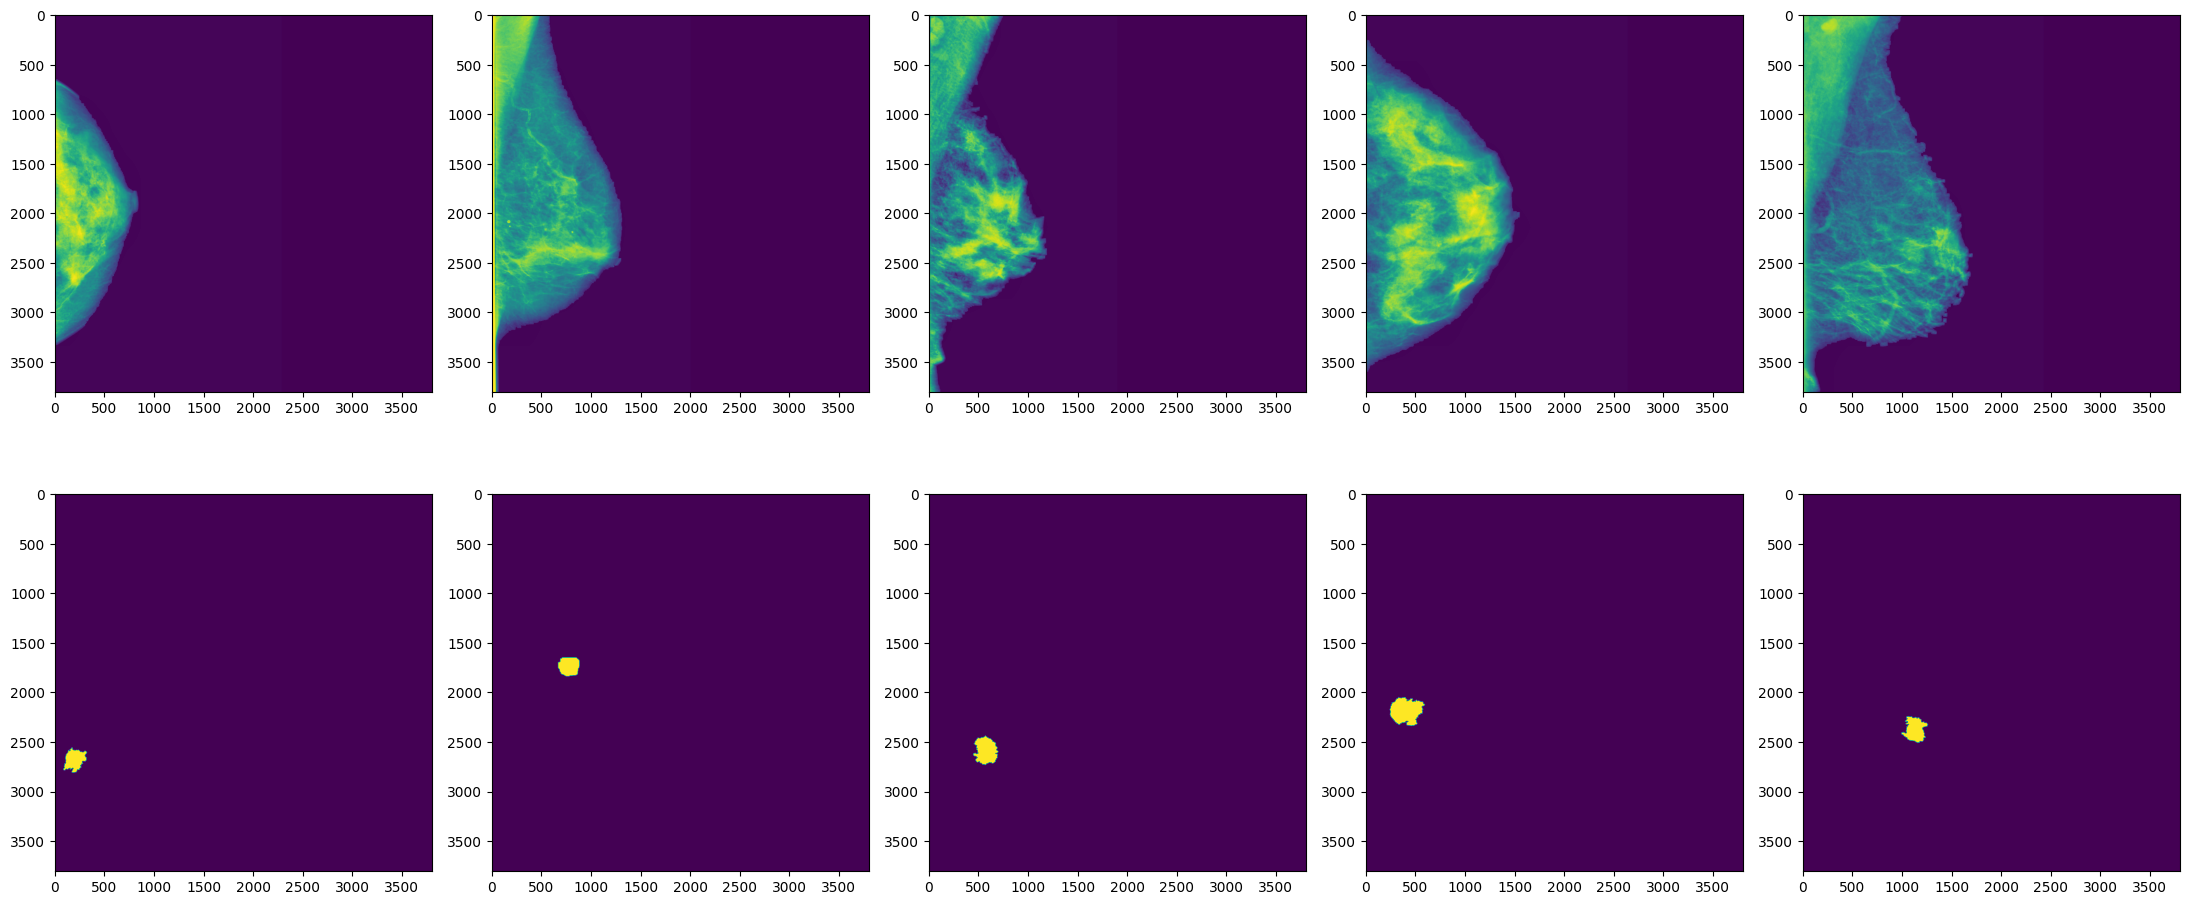

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(22, 10))
mammo_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Mammos\\"
mask_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Masks\\"

for i in range(5):

    mammo = random.choice(os.listdir(mammo_path))
    id = mammo[5:]
    
    mammo_im = plt.imread(mammo_path + mammo)
    mask_im = plt.imread(mask_path + 'mask' + id)
    
    # Plot original image.
    ax[0][i].imshow(mammo_im)
    ax[1][i].imshow(mask_im)

plt.tight_layout()


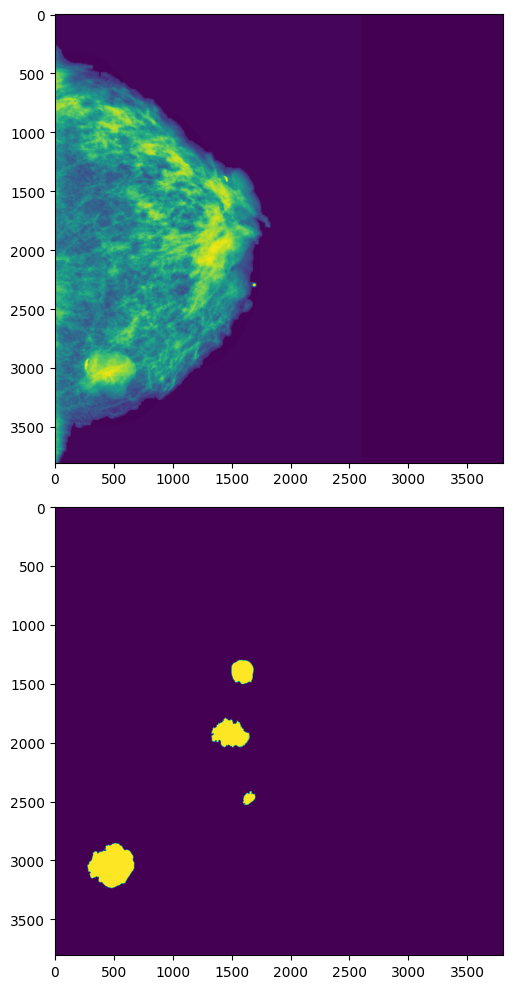

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(22, 10))
mammo_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Mammos\\mammo26.png"
mask_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Masks\\mask26.png"

mammo_im = plt.imread(mammo_path)
mask_im = plt.imread(mask_path)
    
# Plot original image.
ax[0].imshow(mammo_im)
ax[1].imshow(mask_im)

plt.tight_layout()

tensor([[ 273., 1304., 1700., 3239.]])
[0.2592641261498029, 0.5969776609724047, 0.3750328515111695, 0.5085413929040736]


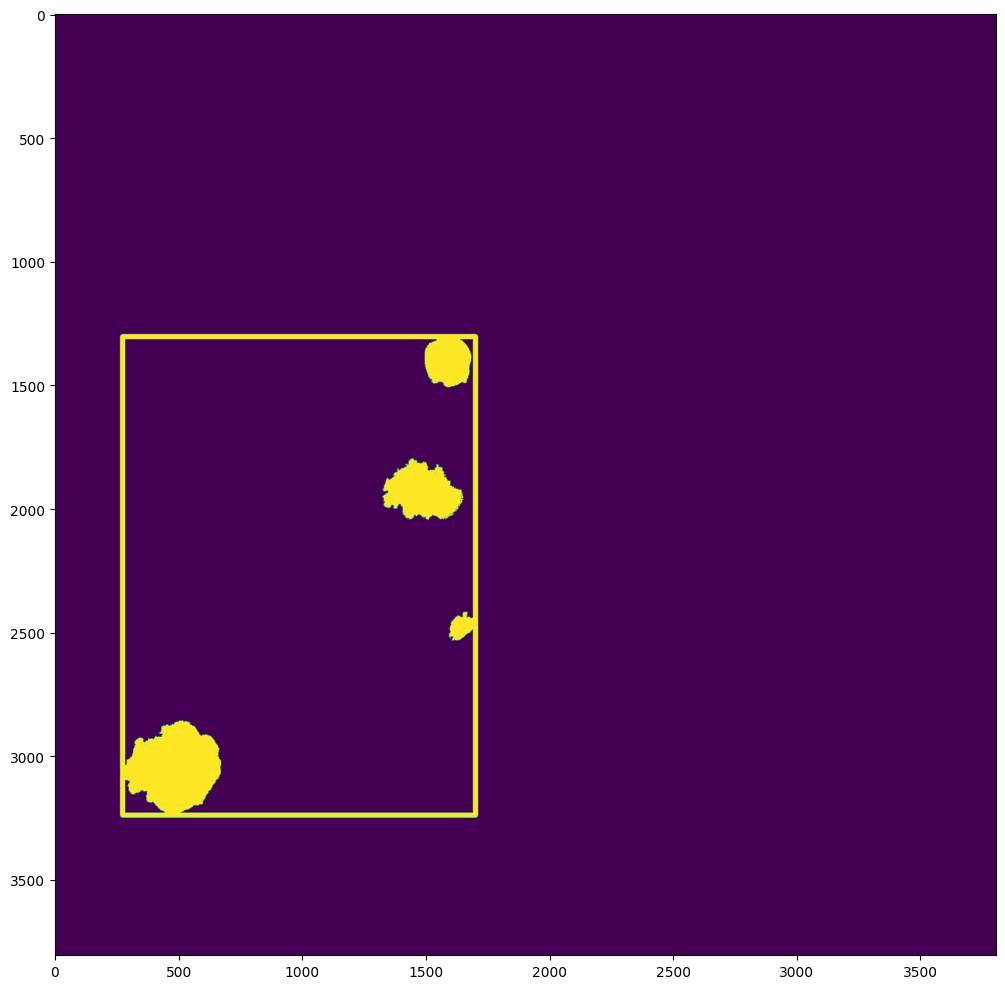

In [39]:
mask_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Masks\\mask26.png"
bb_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Bboxs\\"

from torchvision.ops import masks_to_boxes
import torch
from torchvision.io import read_image

mask = read_image(mask_path)

# We get the unique colors, as these would be the object ids.
obj_ids = torch.unique(mask)

# first id is the background, so remove it.
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set of boolean masks.
# Note that this snippet would work as well if the masks were float values instead of ints.
masks = mask == obj_ids[:, None, None]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(22, 10))

mask_im = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

#unique, counts = np.unique(mask, return_counts=True)
#print(np.asarray((unique, counts)).T)

#bbox = mask_to_boxes(mask)
#bbox = UtilFunctions.mask_to_bbox(mask)
bbox = masks_to_boxes(mask)

print(bbox)

bbox = np.asarray(bbox)

for box in bbox:

    x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
    yoloBox = UtilFunctions.bbox2yolo(x1, y1, x2, y2, 3805, 3805)
    print(yoloBox)

    ax.imshow(UtilFunctions.draw_rect(mask_im, np.asarray([x1, y1, x2, y2])))

plt.tight_layout()

Create bounding boxes using the masks (to be used as ground truth in the object detection task).

In [16]:
mask_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Masks\\"
bb_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Bboxs\\"

for mask in os.listdir(mask_path):

  mask_name = mask
  mask = cv2.imread(mask_path + mask, cv2.IMREAD_GRAYSCALE)

  bbox = UtilFunctions.mask_to_bbox(mask)

  bbox = np.asarray(bbox)

  bbox_path = bb_path + mask_name[:-4]
  with open(bbox_path + '.txt', 'w') as fp:

    for box in bbox:

      x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
      yoloBox = UtilFunctions.bbox2yolo(x1, y1, x2, y2, 3805, 3805)
      fp.write("0 ")
      for cord in yoloBox:
        fp.write("%s " % cord)
      fp.write("\n")

Sample 5 preprocessed mammograms, their correspoding masks and bounding boxes.

D:\BreastSegmentation\Dataset\Preprocessed3805\Bboxs\mask798.txt
[[830.0, 1809.0, 1127.0, 2051.0]]
D:\BreastSegmentation\Dataset\Preprocessed3805\Bboxs\mask701.txt
[[675.0, 1979.0, 890.0, 2153.0], [685.0, 2043.9999999999998, 687.0, 2045.9999999999998], [866.0, 2092.0, 868.0, 2094.0]]
D:\BreastSegmentation\Dataset\Preprocessed3805\Bboxs\mask606.txt
[[410.0, 1263.0, 629.0, 1483.0], [540.0, 1472.0, 542.0, 1474.0]]
D:\BreastSegmentation\Dataset\Preprocessed3805\Bboxs\mask112.txt
[[476.0, 1995.0, 777.0, 2368.0]]
D:\BreastSegmentation\Dataset\Preprocessed3805\Bboxs\mask792.txt
[[509.0, 1820.0, 764.0, 2074.0], [689.0, 2021.0, 691.0, 2023.0], [694.0, 2028.0, 696.0, 2030.0], [575.0, 2030.0000000000002, 580.0, 2032.0000000000002]]


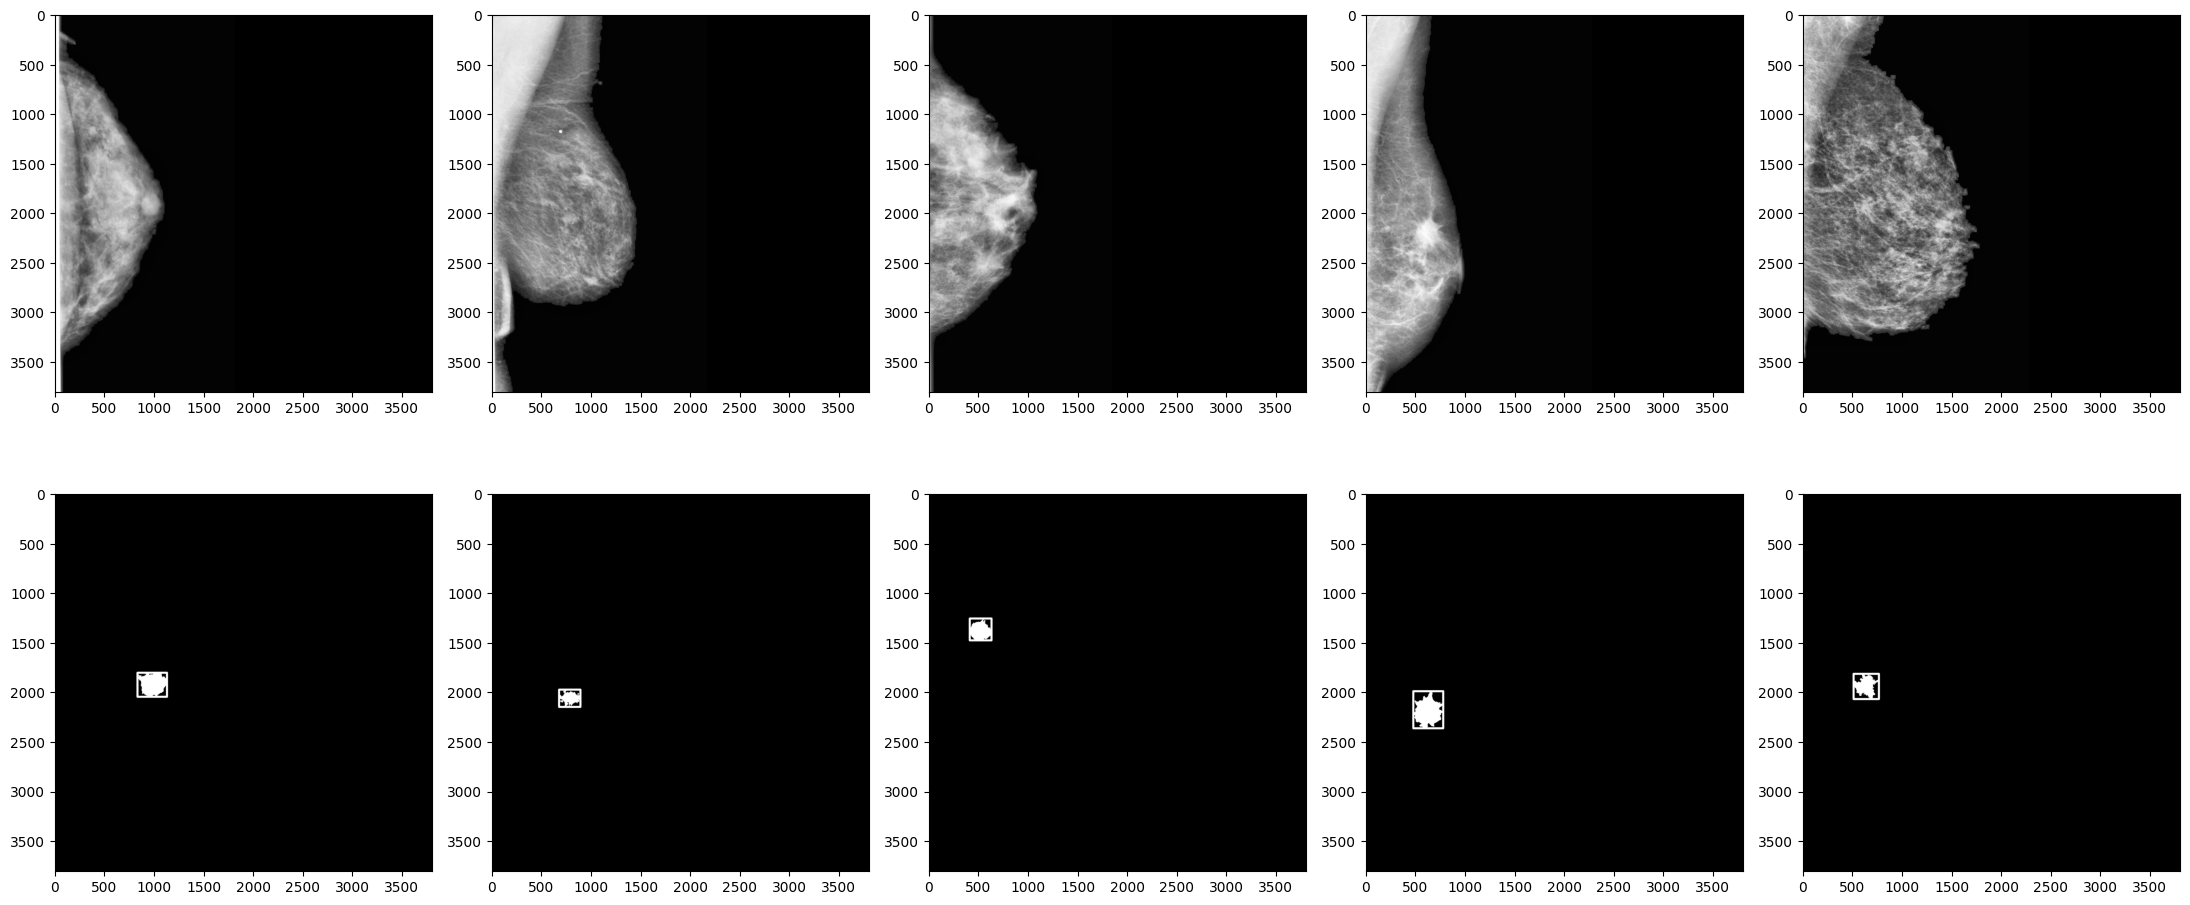

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(22, 10))
mammo_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Mammos\\"
mask_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Masks\\"
bbox_path = "D:\\BreastSegmentation\\Dataset\\Preprocessed3805\\Bboxs\\" 

for i in range(5):

    mammo = random.choice(os.listdir(mammo_path))
    id = mammo[5:]
    
    mammo_im = cv2.imread(mammo_path + mammo)
    mask_im = cv2.imread(mask_path + 'mask' + id)

    print(bbox_path + 'mask' + id[:-4] + '.txt')

    with open(bbox_path + 'mask' + id[:-4] + '.txt') as f:
        bboxs = []
        lines = f.readlines()
        for line in lines:
            bboxs.append(line.split(' ')[1:5])

    for j in range(len(bboxs)):
        bboxs[j] = UtilFunctions.yolo2bbox(float(bboxs[j][0]), float(bboxs[j][1]), float(bboxs[j][2]), float(bboxs[j][3]),  3805, 3805)

    print(bboxs)
    bboxs = np.array(bboxs)
    
    # Plot original image.
    ax[0][i].imshow(mammo_im)
    ax[1][i].imshow(UtilFunctions.draw_rect(mask_im, bboxs))


plt.tight_layout()